In [1]:
def readData(filename):
    with open(filename, 'r') as f:
        data = f.readlines()
    return data

training_images = readData('trainingimages.txt')
training_labels = readData('traininglabels.txt')

In [4]:
def images_to_binary(images):
    # separate each image. Maintain a 3 level list frequency_dark[i][j][k] = number of times the i,j pixel was dark 
    # for the number k (0-9). To obtain this, each time number k shows up in training, add 1 to all the dark pixel locations i,j
    # Leave the white pixels at their value. Keep track of the number of times a number k shows up as you will need to divide 
    # frequency_dar by total number of occurences Nk of the number k, to obtain the probability of pixels being dark. Do not divide yet
    # just return both frequency_dark and Nk from this function
    num_images = int(len(images)/28)
    #Number_count = [0 for i in range(10)] # list of zeros keeping count of how many times a number has occured
    ImageData = [[[0 for i in range(28)] for j in range(28)] for n in range(num_images)]
    
    for n in range(0,num_images):
        line_num = n*28
        #label = labels[n]
        #print(label)
        #Number_count[int(label)] += 1
        for row in range(28):
            for col in range(28):
                
                if images[line_num+row][col] == '+' or images[line_num+row][col] == '#':
                    ImageData[n][col][row] = 1
        #print(frequency_dark[int(label)])
    return ImageData

In [5]:
ImageData = images_to_binary(training_images)

In [9]:
LabelValues = []
for label in training_labels:
    LabelValues.append(int(label))

In [14]:
import numpy as np
Data=[]
for image in ImageData:
    Row=[]
    for i in range(28):
        for j in range(28):
            Row.append(image[i][j])
    Data.append(Row)

In [68]:
from sklearn.svm import SVC
clf = SVC(C = 1, kernel = 'linear')
clf.fit(Data, LabelValues) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
y_pred = clf.predict(Data)

In [62]:
count = 0
for pred,correct in zip(y_pred,LabelValues):
    if pred==correct:
        count=count+1
count/len(y_pred)

1.0

In [34]:
test_images = readData('testimages.txt')
testlabels = readData('testlabels.txt')
TestLabelValues = []
for label in testlabels:
    TestLabelValues.append(int(label))

In [36]:
TestImages = images_to_binary(test_images)
TestData=[]
for image in TestImages:
    Row=[]
    for i in range(28):
        for j in range(28):
            Row.append(image[i][j])
    TestData.append(Row)

In [69]:
test_pred = clf.predict(TestData)

In [70]:
count = 0
for pred,correct in zip(test_pred,TestLabelValues):
    if pred==correct:
        count=count+1
count/len(test_pred)

0.875

In [71]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(TestLabelValues, test_pred)

In [89]:
cmat

array([[ 86,   0,   1,   0,   0,   2,   1,   0,   0,   0],
       [  0, 107,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   2,  93,   1,   0,   1,   2,   1,   1,   2],
       [  0,   0,   1,  86,   0,   7,   0,   4,   2,   0],
       [  0,   0,   0,   0,  97,   0,   2,   2,   0,   6],
       [  1,   0,   0,   5,   1,  81,   2,   0,   1,   1],
       [  0,   1,   2,   0,   2,   0,  84,   0,   2,   0],
       [  1,   4,   3,   3,   0,   0,   0,  88,   0,   7],
       [  2,   2,   2,  11,   2,   3,   1,   2,  73,   5],
       [  0,   0,   1,   5,   6,   2,   0,   5,   1,  80]])

In [118]:
# from sklearn import preprocessing
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# for i in range(10):
#     w = clf.coef_[i] - clf.coef_[0]
#     b = clf.intercept_[7]
#     w = w.reshape((28,28))
#     min_max_scaler = preprocessing.MinMaxScaler()
#     w = min_max_scaler.fit_transform(w)  
#     plt.imshow(w, cmap = cm.gray)
#     #plt.colorbar()
#     plt.show()

original label =  9
predicted label =  4


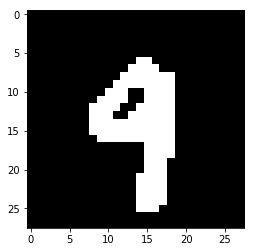

original label =  6
predicted label =  2


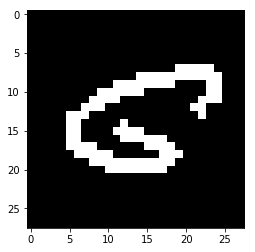

original label =  5
predicted label =  9


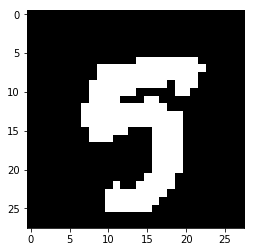

original label =  7
predicted label =  9


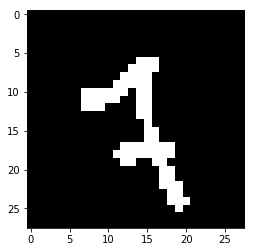

original label =  6
predicted label =  8


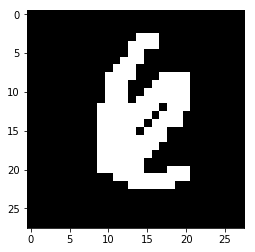

original label =  8
predicted label =  9


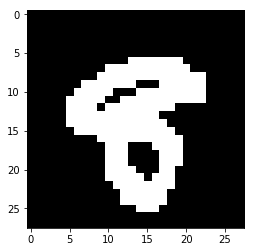

original label =  3
predicted label =  7


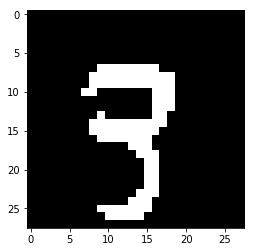

original label =  7
predicted label =  3


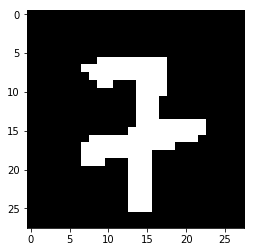

original label =  8
predicted label =  2


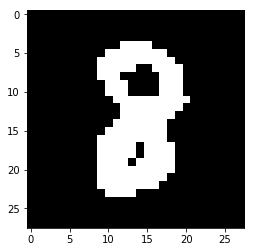

original label =  8
predicted label =  3


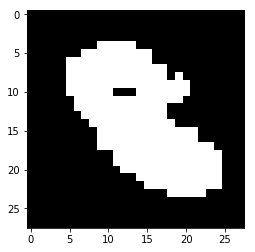

original label =  9
predicted label =  3


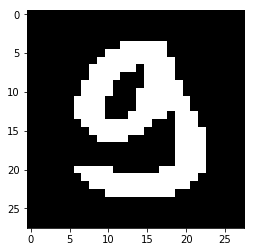

original label =  4
predicted label =  6


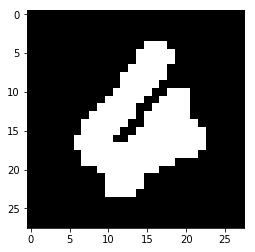

original label =  3
predicted label =  8


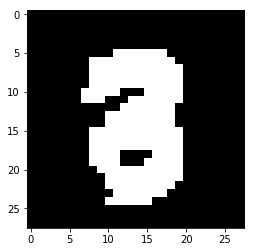

original label =  7
predicted label =  3


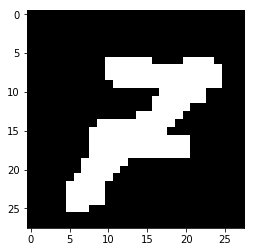

original label =  8
predicted label =  7


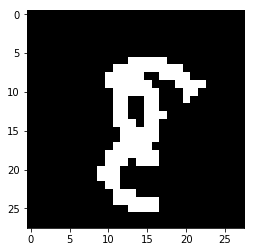

original label =  8
predicted label =  9


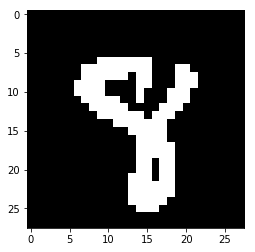

original label =  2
predicted label =  1


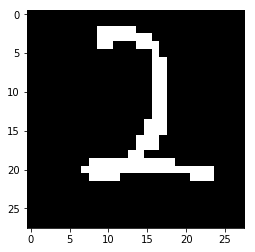

original label =  4
predicted label =  7


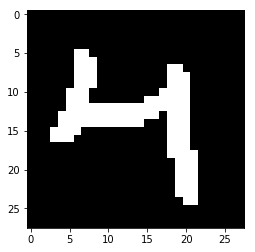

original label =  6
predicted label =  1


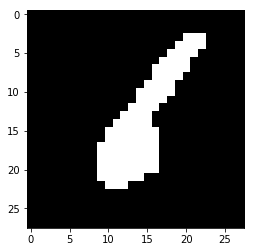

original label =  6
predicted label =  8


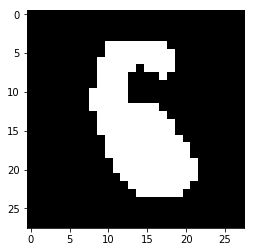

original label =  8
predicted label =  9


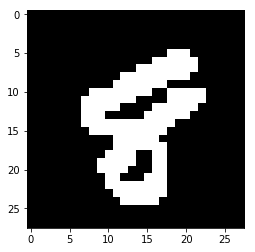

original label =  9
predicted label =  4


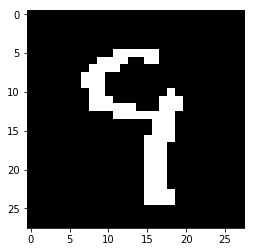

original label =  8
predicted label =  4


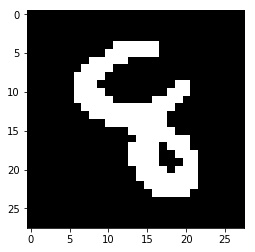

original label =  8
predicted label =  5


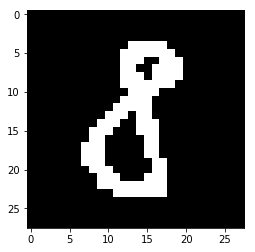

original label =  3
predicted label =  8


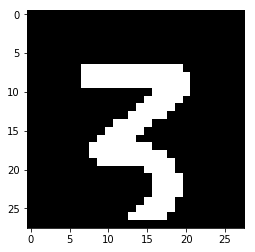

original label =  7
predicted label =  2


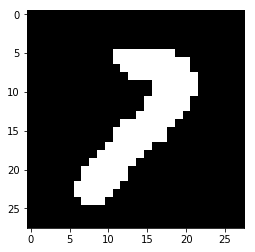

original label =  7
predicted label =  1


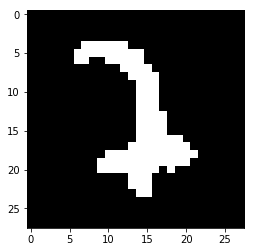

original label =  9
predicted label =  3


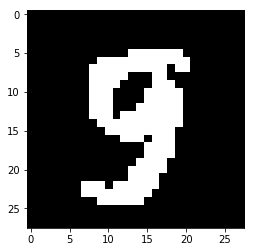

original label =  9
predicted label =  4


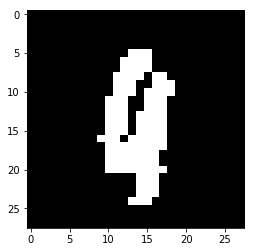

original label =  8
predicted label =  3


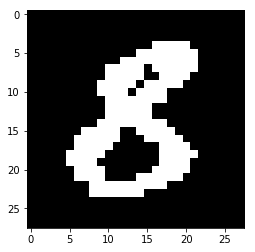

original label =  4
predicted label =  9


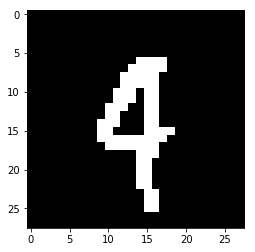

original label =  5
predicted label =  6


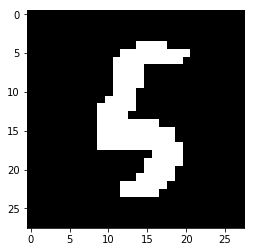

original label =  9
predicted label =  5


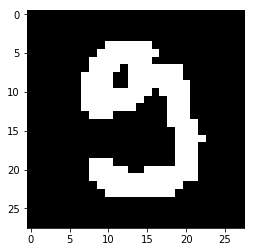

original label =  8
predicted label =  5


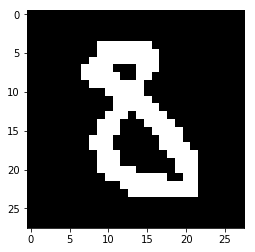

original label =  2
predicted label =  5


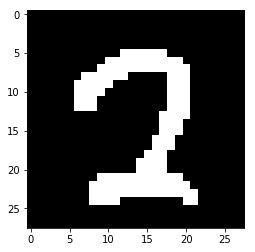

original label =  7
predicted label =  1


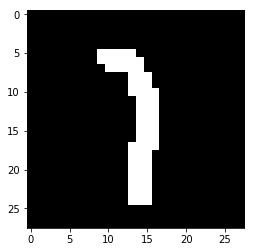

original label =  8
predicted label =  3


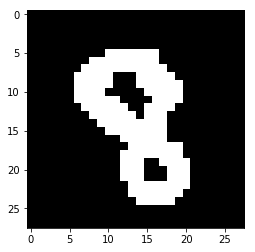

original label =  4
predicted label =  9


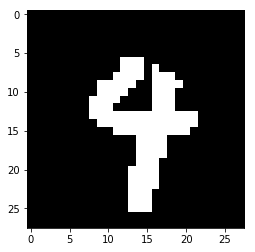

original label =  5
predicted label =  4


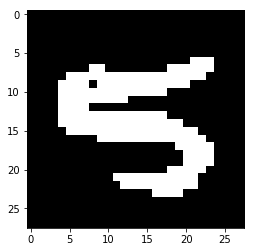

original label =  7
predicted label =  2


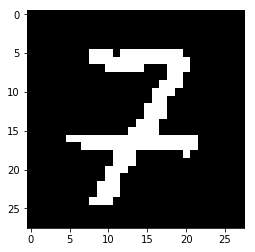

original label =  5
predicted label =  3


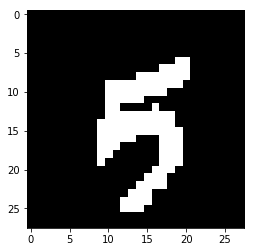

original label =  3
predicted label =  5


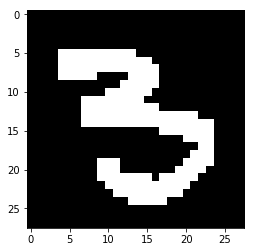

original label =  5
predicted label =  3


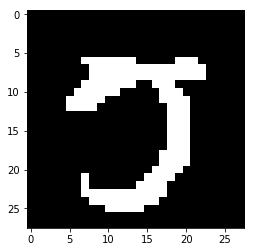

original label =  9
predicted label =  7


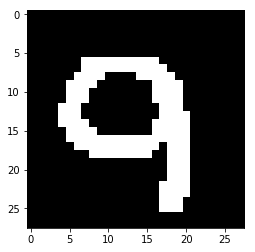

original label =  3
predicted label =  7


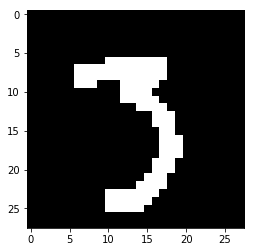

original label =  8
predicted label =  3


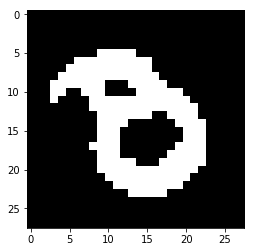

original label =  8
predicted label =  6


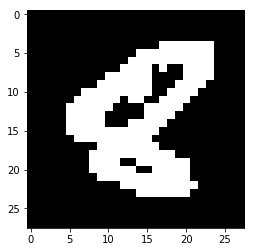

original label =  7
predicted label =  2


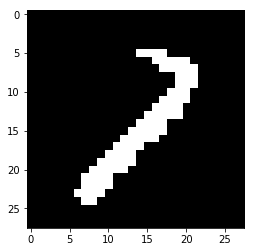

original label =  9
predicted label =  7


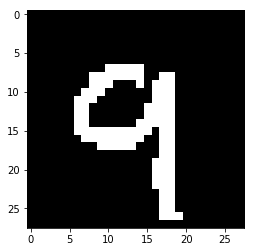

original label =  7
predicted label =  9


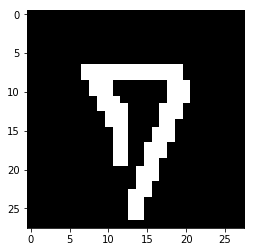

original label =  2
predicted label =  6


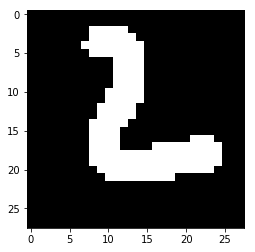

original label =  7
predicted label =  9


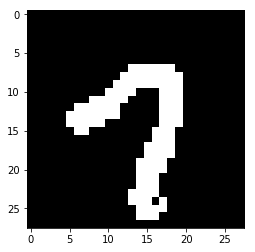

original label =  4
predicted label =  9


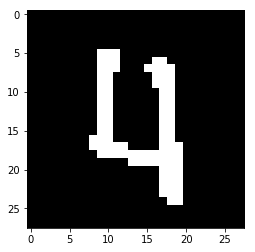

original label =  5
predicted label =  6


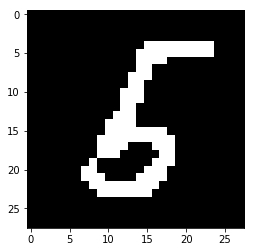

original label =  3
predicted label =  5


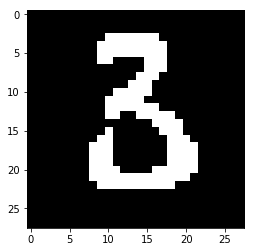

original label =  4
predicted label =  9


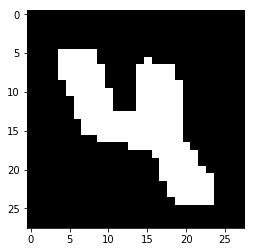

original label =  8
predicted label =  3


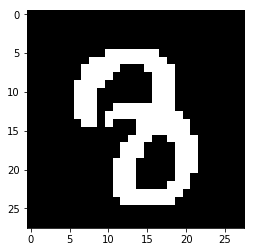

original label =  0
predicted label =  5


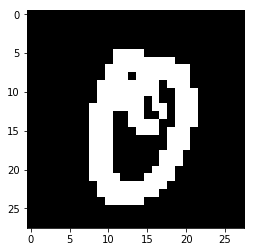

original label =  9
predicted label =  4


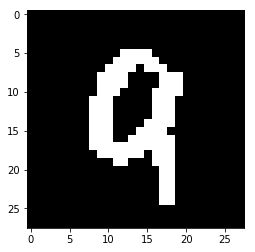

original label =  8
predicted label =  1


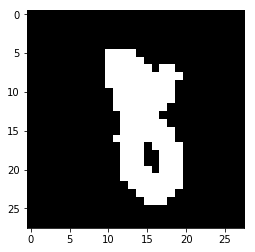

original label =  4
predicted label =  9


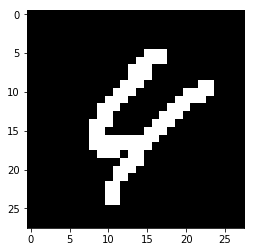

original label =  5
predicted label =  3


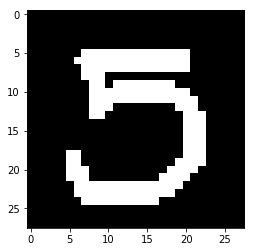

original label =  3
predicted label =  5


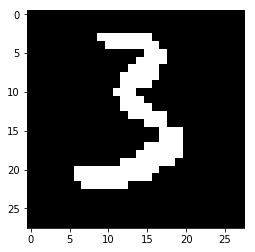

original label =  7
predicted label =  0


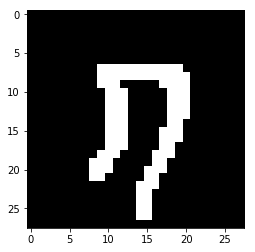

original label =  7
predicted label =  1


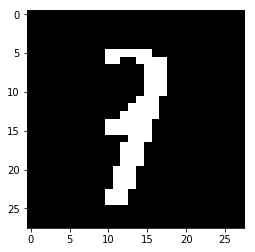

original label =  7
predicted label =  9


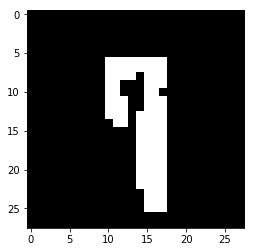

original label =  5
predicted label =  3


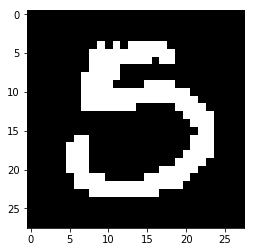

original label =  1
predicted label =  6


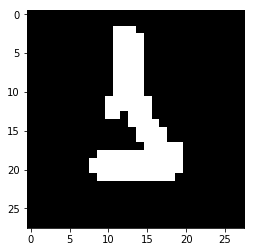

original label =  8
predicted label =  7


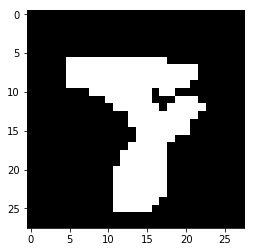

original label =  3
predicted label =  5


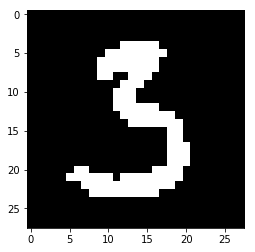

original label =  9
predicted label =  3


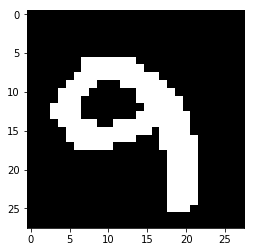

original label =  2
predicted label =  3


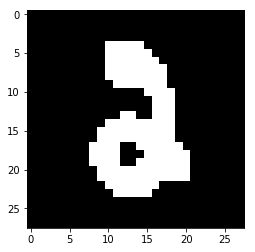

original label =  4
predicted label =  6


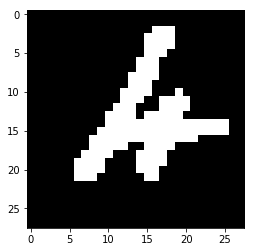

original label =  9
predicted label =  3


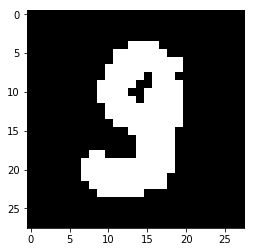

original label =  9
predicted label =  3


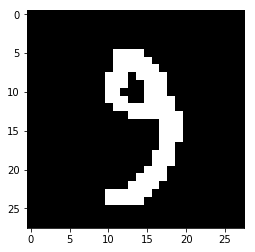

original label =  8
predicted label =  3


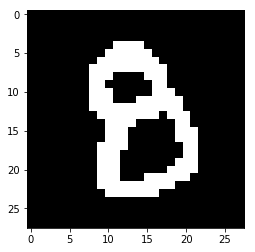

original label =  7
predicted label =  9


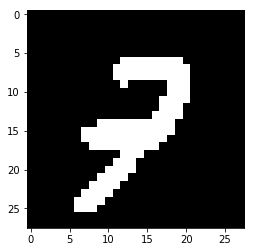

original label =  9
predicted label =  4


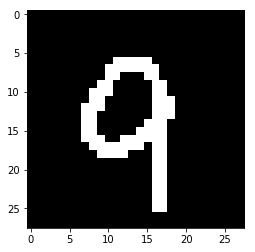

original label =  3
predicted label =  5


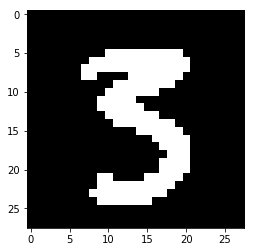

original label =  3
predicted label =  7


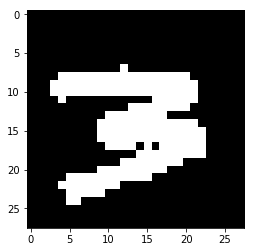

original label =  2
predicted label =  6


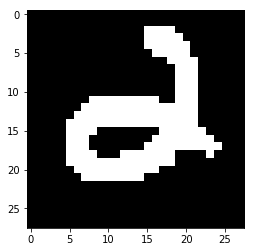

original label =  3
predicted label =  5


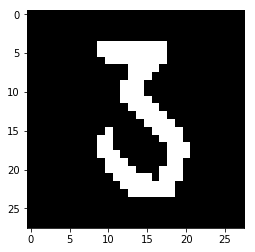

original label =  0
predicted label =  6


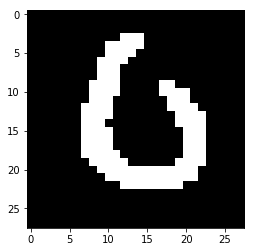

original label =  4
predicted label =  7


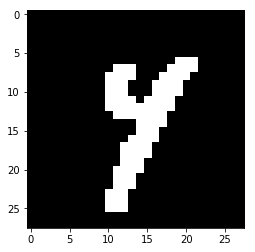

original label =  9
predicted label =  7


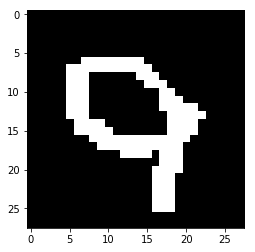

original label =  8
predicted label =  3


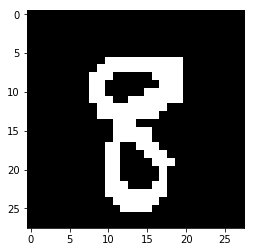

original label =  7
predicted label =  9


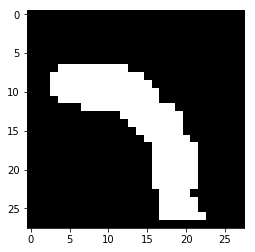

original label =  3
predicted label =  7


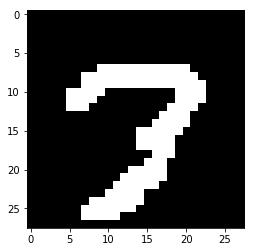

original label =  2
predicted label =  7


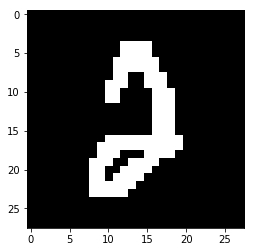

original label =  8
predicted label =  2


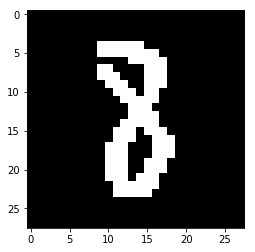

original label =  9
predicted label =  7


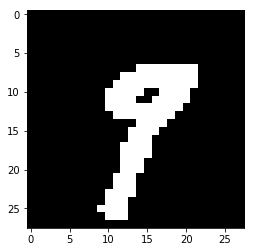

original label =  2
predicted label =  9


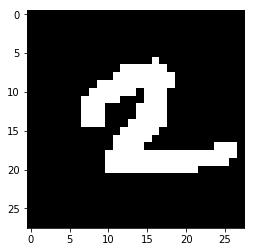

original label =  9
predicted label =  5


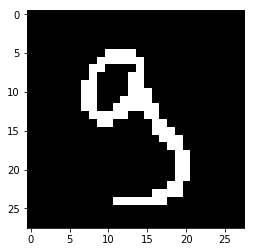

original label =  8
predicted label =  0


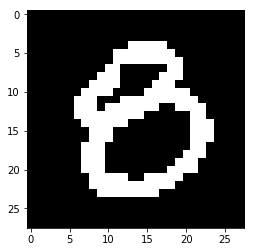

original label =  7
predicted label =  9


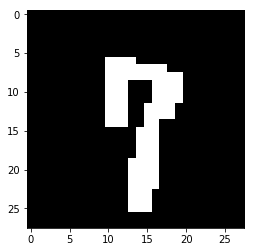

original label =  9
predicted label =  7


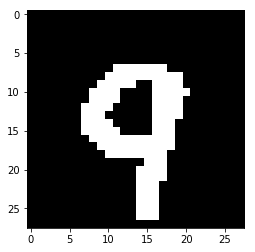

original label =  7
predicted label =  3


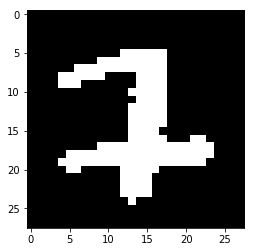

original label =  8
predicted label =  0


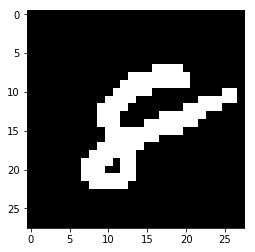

original label =  0
predicted label =  5


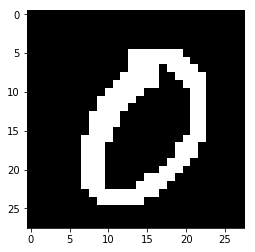

original label =  3
predicted label =  2


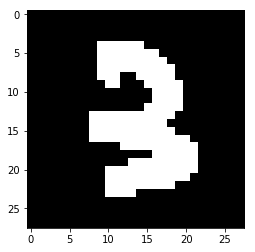

original label =  8
predicted label =  3


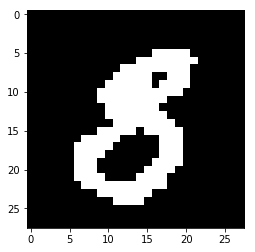

original label =  8
predicted label =  9


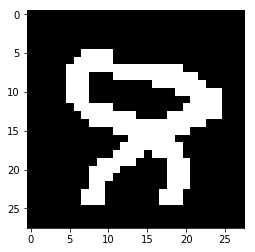

original label =  2
predicted label =  9


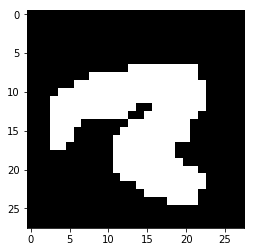

original label =  9
predicted label =  2


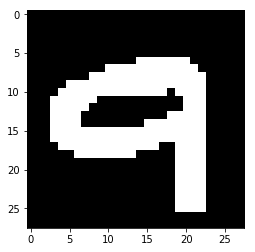

original label =  8
predicted label =  5


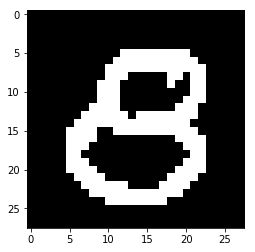

original label =  4
predicted label =  9


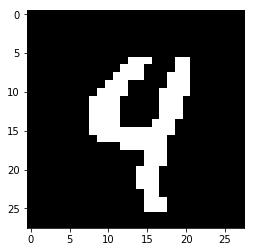

original label =  2
predicted label =  1


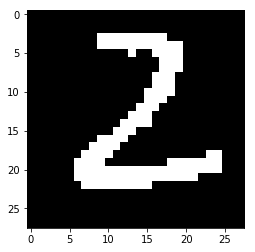

original label =  6
predicted label =  4


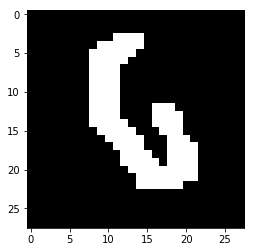

original label =  8
predicted label =  4


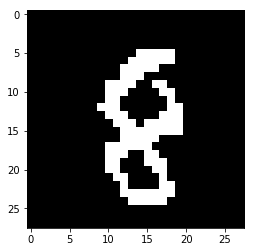

original label =  3
predicted label =  5


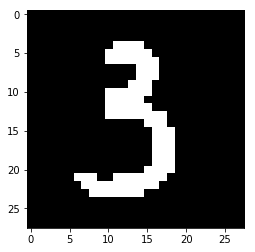

original label =  2
predicted label =  8


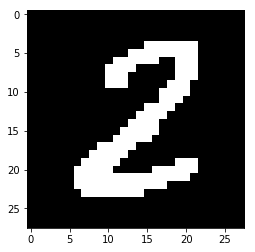

original label =  0
predicted label =  2


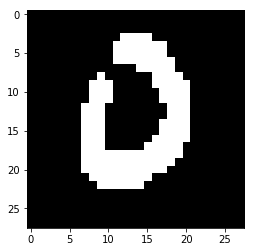

original label =  8
predicted label =  9


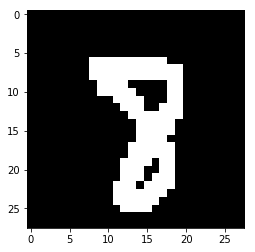

original label =  8
predicted label =  3


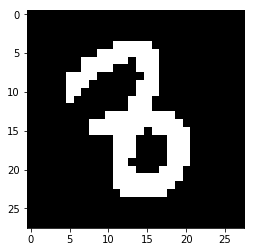

original label =  8
predicted label =  3


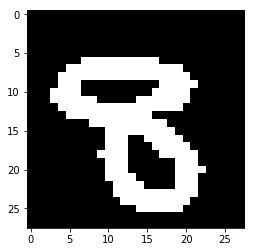

original label =  8
predicted label =  3


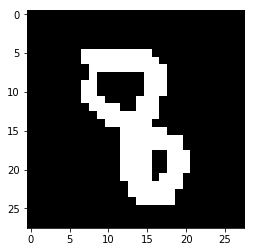

original label =  9
predicted label =  4


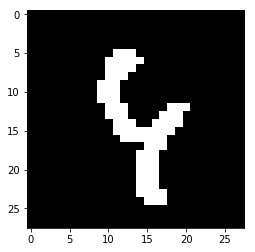

original label =  7
predicted label =  1


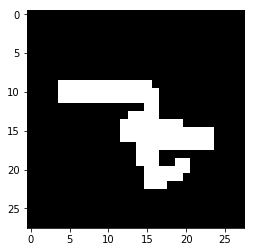

original label =  5
predicted label =  8


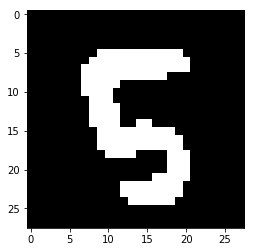

original label =  5
predicted label =  0


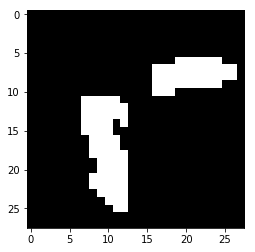

original label =  9
predicted label =  8


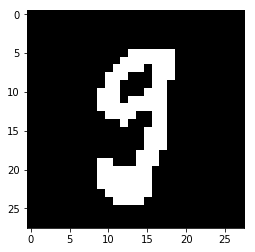

original label =  8
predicted label =  1


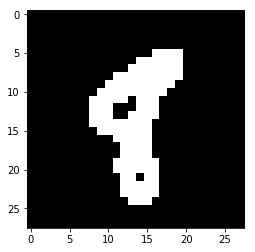

original label =  6
predicted label =  2


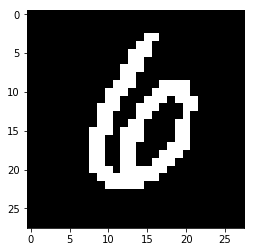

original label =  5
predicted label =  3


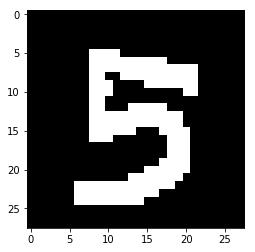

original label =  6
predicted label =  4


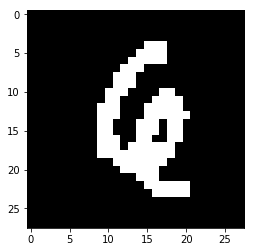

In [152]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import ndimage

for i in range(len(test_pred)):
    if TestLabelValues[i] != test_pred[i]:#==7:
        #if test_pred[i] !=7:
            print('original label = ', TestLabelValues[i])
            print('predicted label = ',test_pred[i])
            #print(i)
            
            val=np.array(TestImages[i])
            
            val=val[::-1]
            val=ndimage.rotate(val, -90)
            plt.imshow(val, cmap = cm.gray)
            plt.show()